@Author: Bhupinder Singh

@Date: 16-02-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 18-02-2023

@Title: Image Filtering, object detection and Template matching

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter
import skimage
from skimage import data
import os

## High Pass Filters

In [19]:
image = cv2.imread('lena.jpg')
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# performing the edge detetcion
gradients_sobelx = cv2.Sobel(image, -1, 1, 0)
gradients_sobely = cv2.Sobel(image, -1, 0, 1)
gradients_sobelxy = cv2.addWeighted(gradients_sobelx, 0.5, gradients_sobely, 0.5, 0)

gradients_laplacian = cv2.Laplacian(image, -1)

canny_output = cv2.Canny(image, 80, 150)

cv2.imshow('Sobel x', gradients_sobelx)
cv2.imshow('Sobel y', gradients_sobely)
cv2.imshow('Sobel X+y', gradients_sobelxy)
cv2.imshow('laplacian', gradients_laplacian)
cv2.imshow('Canny', canny_output)
cv2.waitKey(0)

-1

# Low Pass Filters 

Averaging using cv2.filter2D

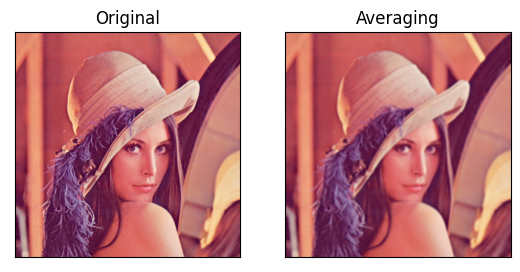

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Averaging using blur method

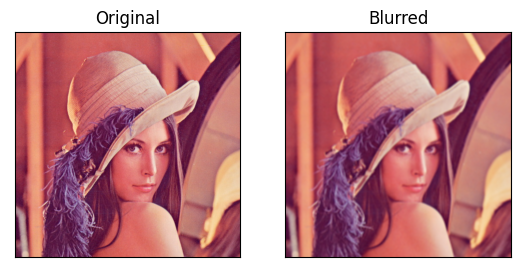

In [27]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Gaussian Filtering

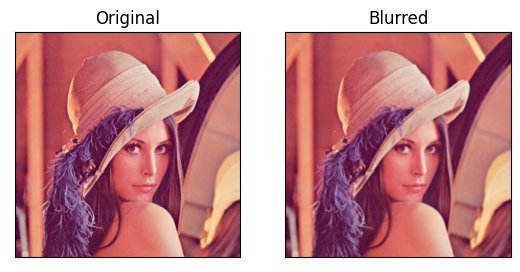

In [18]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Median Filtering

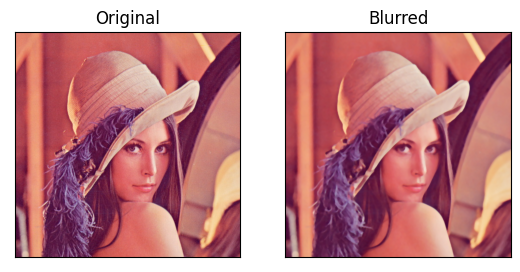

In [25]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Bilateral Filtering

Other filters we used tend to blur edges. This is not the case for the bilateral filter, cv2.bilateralFilter(), which was defined for, and is highly effective at noise removal while preserving edges

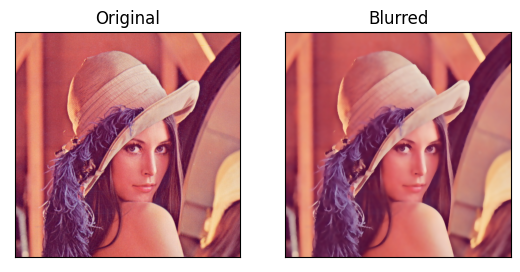

In [26]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Object detection by template Matching

In [46]:
import numpy as np
import cv2

img = cv2.imread('soccer_practice.jpg', 0)
template = cv2.imread('ball.png', 0)
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR_NORMED]

for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    location = max_loc

    bottom_right = (location[0] + w, location[1] + h)    
    cv2.rectangle(img2, location, bottom_right, 255, 5)
    cv2.imshow('Match', img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Image Segmentation using thresholding

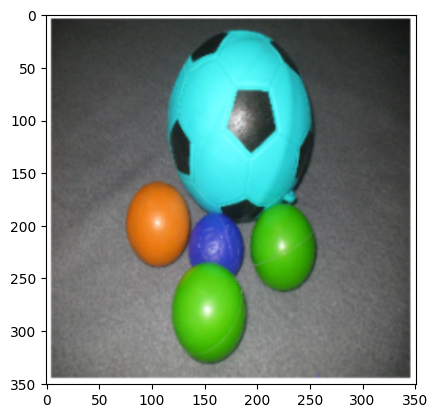

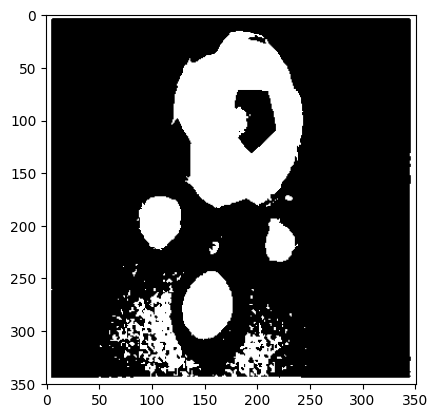

In [60]:
image = cv2.imread('ball_segmentation.webp')
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure("Original")
plt.imshow(image, cmap= "gray")

plt.figure("segmented_otsu")
plt.imshow(thresh, cmap= "gray")

plt.show()



Applying the mask on original Image

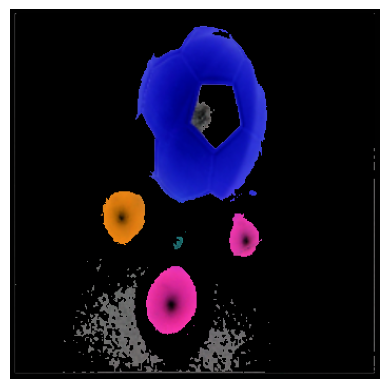

In [63]:
def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, thresh)

plt.axis('off')
plt.imshow(filtered)

Image Segmentation using Color Masking

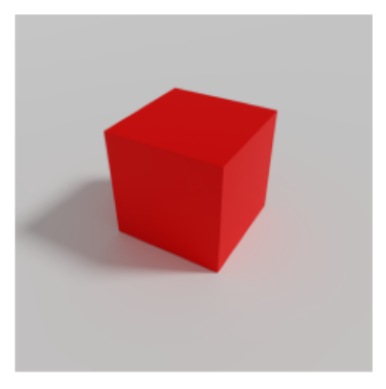

In [67]:
from skimage.filters import threshold_otsu

sample_image = cv2.imread('3d-shapes.webp')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

Creating mask for oringnal image

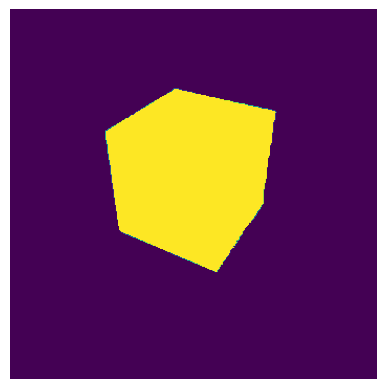

In [68]:
low = np.array([0, 0, 0])
high = np.array([215, 51, 51])

mask = cv2.inRange(img, low, high)

plt.axis('off')
plt.imshow(mask)

Apply the Mask on original Image to get the segmented image

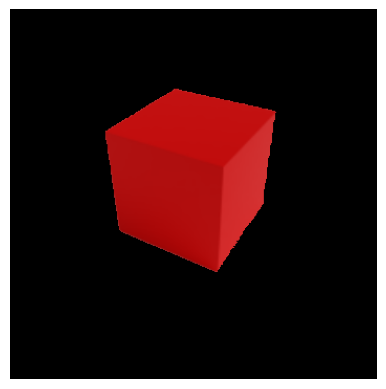

In [69]:
result = cv2.bitwise_and(img, img, mask=mask)

plt.axis('off')
plt.imshow(result)

### Image Filteration using Pillow

In [11]:
img = Image.open("lena.jpg")

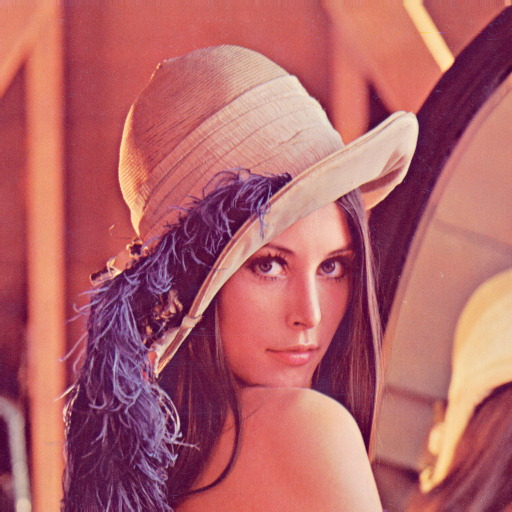

In [12]:
img

Basic Properties

In [14]:
print('Format:',img.format)

print('Size',img.size)

print('Mode:', img.mode)

Format: JPEG
Size (512, 512)
Mode: RGB


### Filters

Blur Image

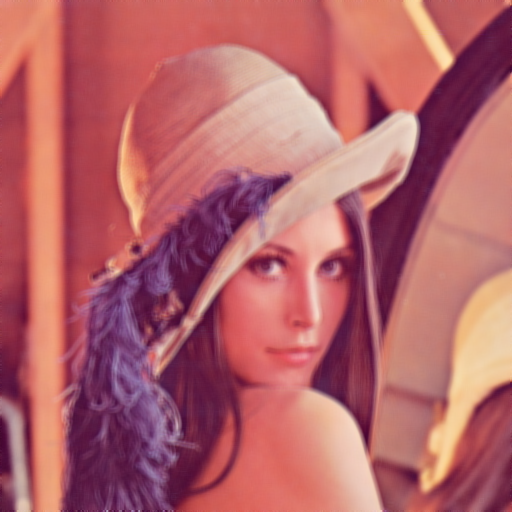

In [28]:
blurred = img.filter(ImageFilter.BLUR)
blurred

Sharpen Image

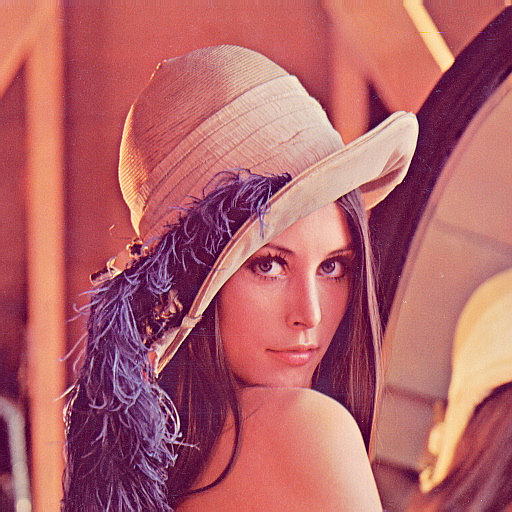

In [30]:
sharped= img.filter(ImageFilter.SHARPEN)
sharped

### Finding Edges

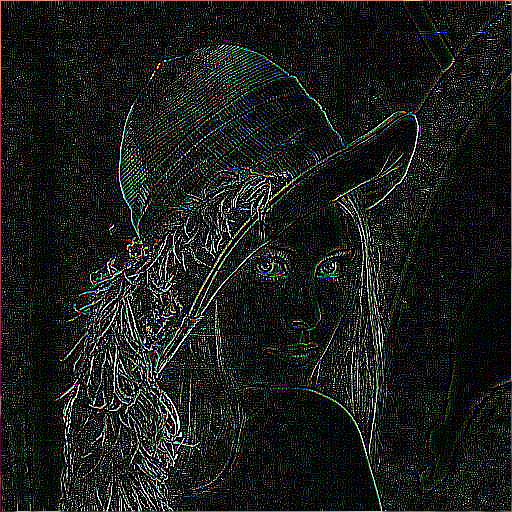

In [31]:
edges = sharped.filter(ImageFilter.FIND_EDGES)
edges

Enhancing Edges

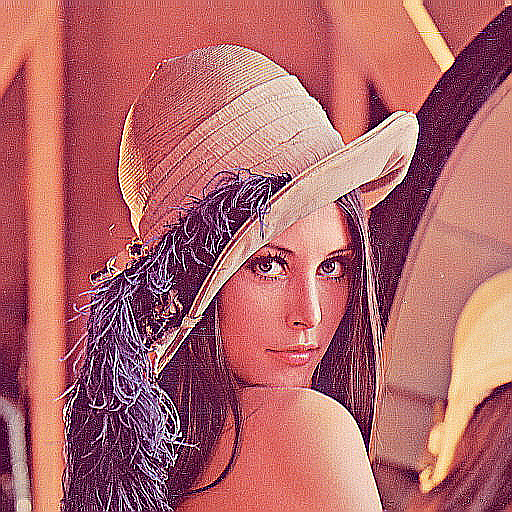

In [32]:
en_edges = sharped.filter(ImageFilter.EDGE_ENHANCE)
en_edges

Emboss Filter

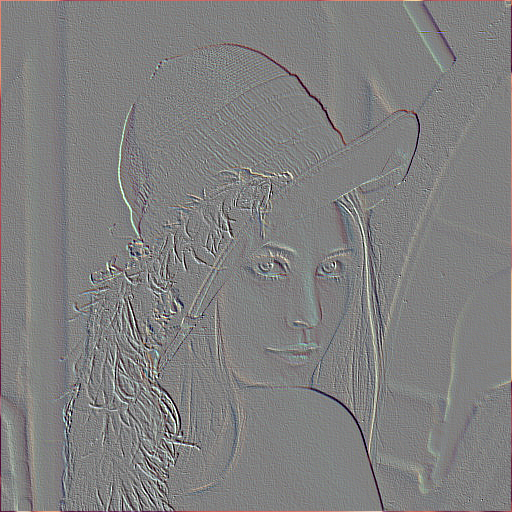

In [33]:
emb = sharped.filter(ImageFilter.EMBOSS)
emb